<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [23]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-02 15:40:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.9MB/s    in 3.2s    

2025-06-02 15:40:36 (62.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [25]:
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [26]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [27]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [28]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


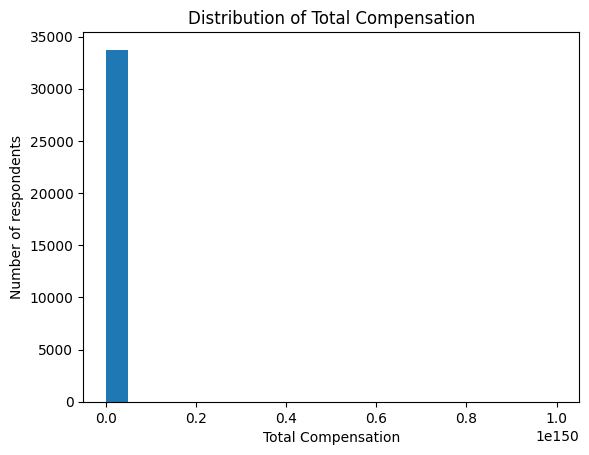

In [33]:
Query = """
SELECT CompTotal
FROM main
"""
df_comp = pd.read_sql_query(Query, conn)
plt.hist(df_comp['CompTotal'], bins=20)
plt.xlabel('Total Compensation')
plt.ylabel('Number of respondents')
plt.title('Distribution of Total Compensation')
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


       YearsCodePro
0              17.0
1              27.0
2               7.0
3              11.0
4              25.0
...             ...
51605           7.0
51606          24.0
51607           3.0
51608           5.0
51609           2.0

[51610 rows x 1 columns]


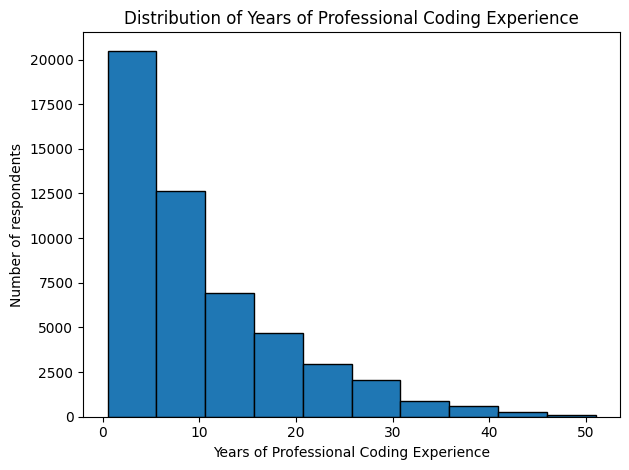

In [63]:
Query = """
SELECT
  CASE
    WHEN YearsCodePro = 'Less than 1 year' THEN 0.5
    WHEN YearsCodePro = 'More than 50 years' THEN 51
    ELSE CAST(YearsCodePro AS FLOAT)
  END AS YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL;
"""
df_years = pd.read_sql_query(Query, conn)
print(df_years)

plt.hist(df_years['YearsCodePro'],  edgecolor = 'black')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of respondents')
plt.title('Distribution of Years of Professional Coding Experience')
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


   AgeNumeric              Age  CompTotal
0        21.0  18-24 years old  2040000.0
1        29.5  25-34 years old    28000.0
2        39.5  35-44 years old    85000.0
3        39.5  35-44 years old    50000.0
4        29.5  25-34 years old   110000.0


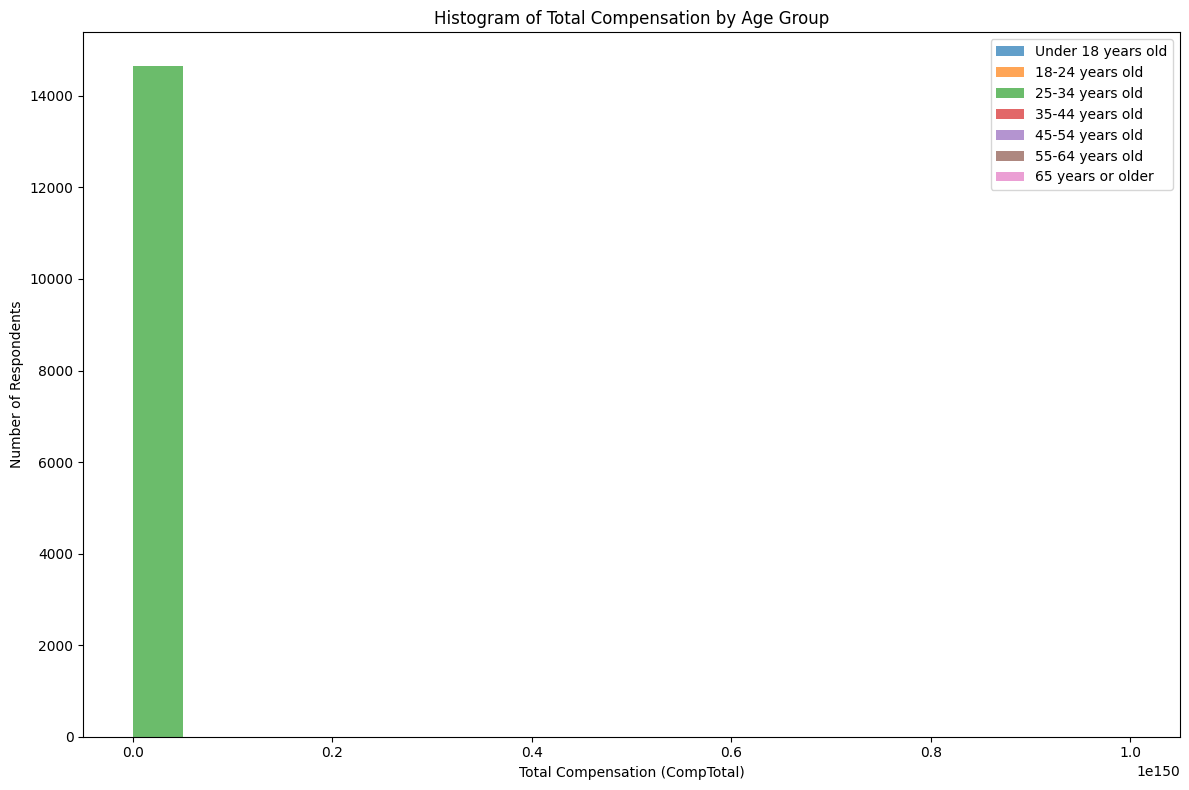

In [102]:
Query = """
SELECT
    CASE
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70
        ELSE NULL
    END AS AgeNumeric,
    Age,
    CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL AND Age != 'Prefer not to say';
"""
df_age_comp = pd.read_sql_query(Query, conn)
print(df_age_comp.head())

age_groups = df_age_comp['Age'].unique()
age_groups = sorted(age_groups, key=lambda x: df_age_comp[df_age_comp['Age'] == x]['AgeNumeric'].iloc[0])

plt.figure(figsize=(12, 8))

for age_group in age_groups:
    plt.hist(df_age_comp[df_age_comp['Age'] == age_group]['CompTotal'], bins=20, alpha=0.7, label=age_group)

plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Total Compensation by Age Group")
plt.legend()
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


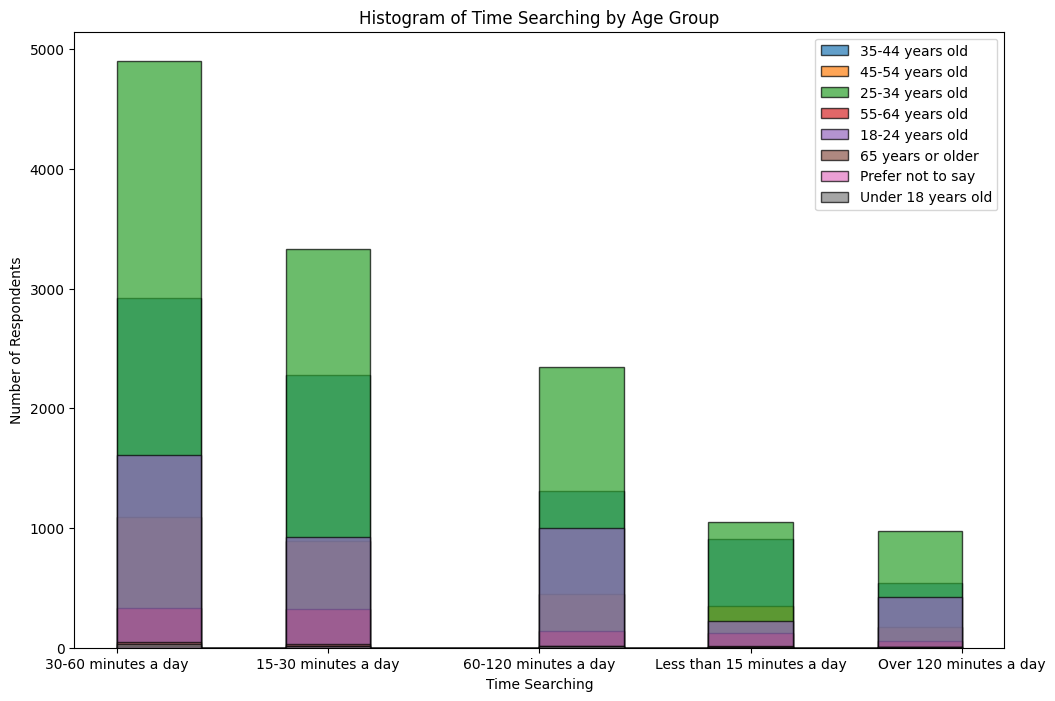

In [101]:
Query = """
SELECT
    TimeSearching,
    Age
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL;
"""
df_time_searching = pd.read_sql_query(Query, conn)

age_groups = df_time_searching['Age'].unique()

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.hist(df_time_searching[df_time_searching['Age'] == age_group]
     ['TimeSearching'], label=age_group, alpha=0.7, edgecolor = 'black')

plt.xlabel("Time Searching")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Time Searching by Age Group")
plt.legend()
plt.show()




### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


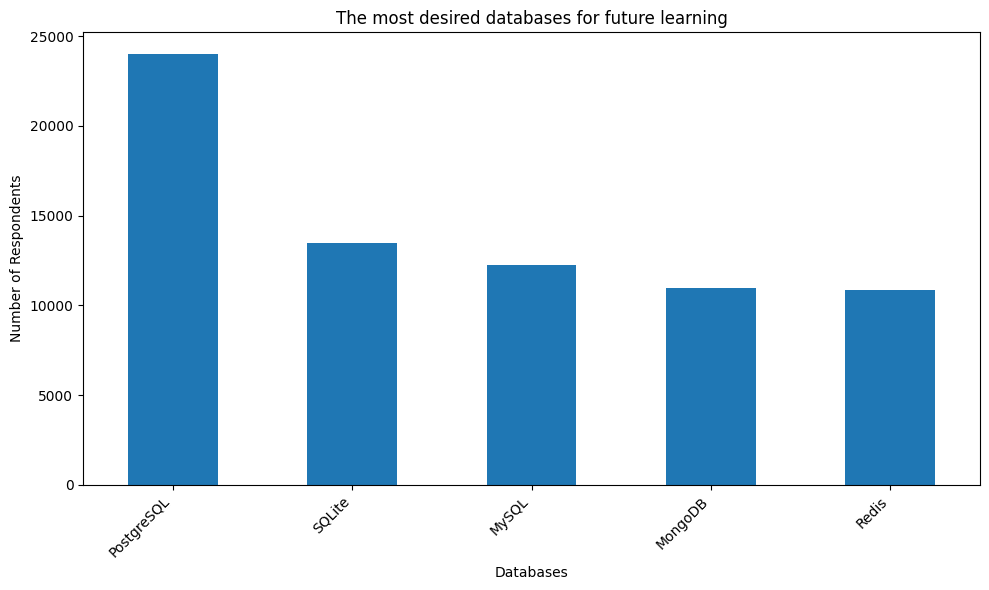

In [107]:
Query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_databases = pd.read_sql_query(Query, conn)

all_databases = []
for databases_list in df_databases['DatabaseWantToWorkWith']:
    all_databases.extend([db.strip() for db in databases_list.split(';')])

database_counts = pd.Series(all_databases).value_counts()

top_5_databases = database_counts.head(5)

plt.figure(figsize=(10, 6))
top_5_databases.plot(kind='bar')
plt.title('The most desired databases for future learning')
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

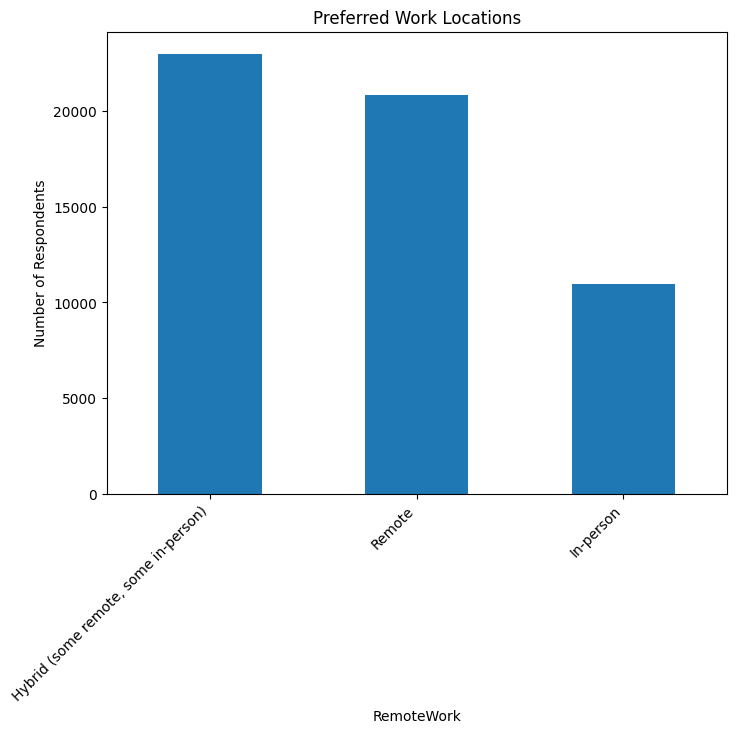

In [110]:
Query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""

df_work_locations = pd.read_sql_query(Query, conn)

work_location_counts = df_work_locations['RemoteWork'].value_counts()

plt.figure(figsize=(8, 6))
work_location_counts.plot(kind='bar')
plt.title('Preferred Work Locations')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


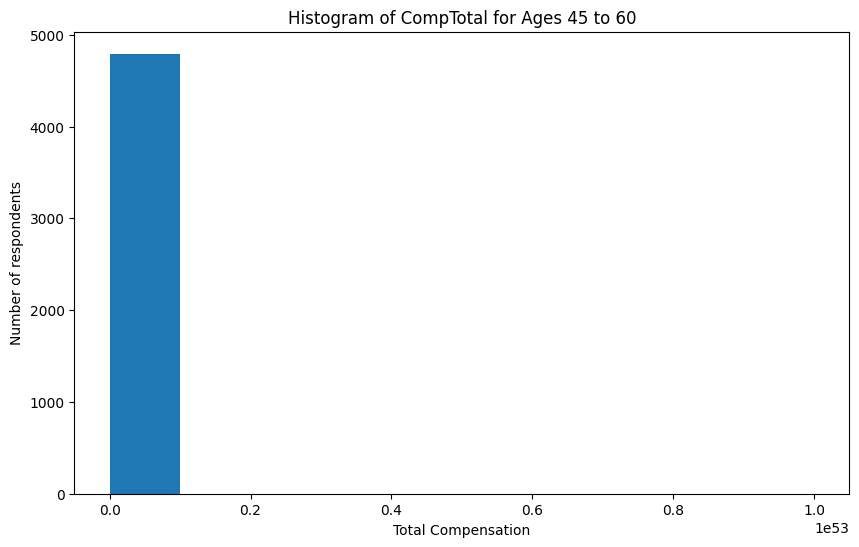

In [114]:
Query = """
SELECT CompTotal, Age
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
"""

df_comp_age = pd.read_sql_query(Query, conn)

plt.figure(figsize=(10, 6))
plt.hist(df_comp_age['CompTotal'])
plt.xlabel('Total Compensation')
plt.ylabel('Number of respondents')
plt.title('Histogram of CompTotal for Ages 45 to 60')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


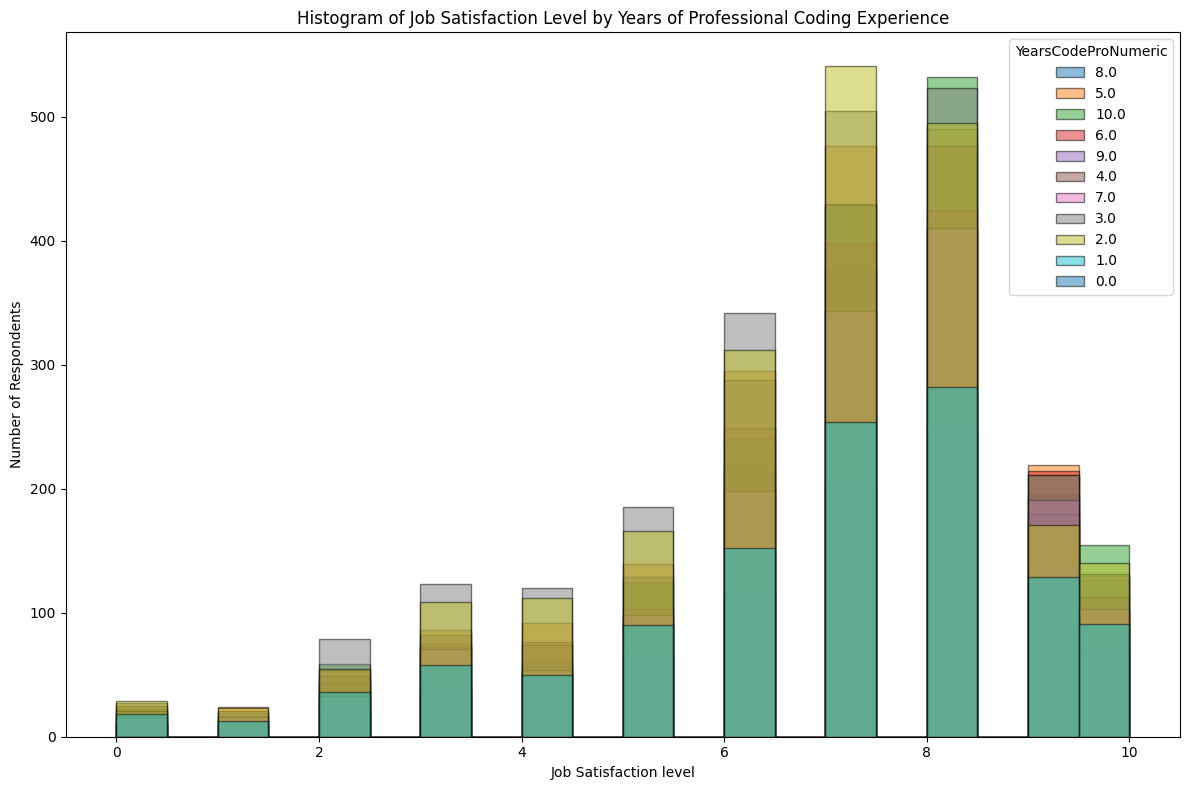

In [125]:
Query = """
SELECT
  JobSat,
  CASE
    WHEN YearsCodePro = 'Less than 1 year' THEN 0.5
    WHEN YearsCodePro = 'More than 50 years' THEN 51
    ELSE CAST(YearsCodePro AS FLOAT)
  END AS YearsCodeProNumeric
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;
"""


df_job_sat_years = pd.read_sql_query(Query, conn)

job_sat_levels = df_job_sat_years['JobSat'].unique()

plt.figure(figsize=(12, 8))

for job_sat_level in job_sat_levels:
    plt.hist(df_job_sat_years[df_job_sat_years['YearsCodeProNumeric'] == job_sat_level]['JobSat'],
             bins=20, alpha=0.5, label=job_sat_level, edgecolor = 'black')

plt.xlabel('Job Satisfaction level')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Job Satisfaction Level by Years of Professional Coding Experience')
plt.legend(title='YearsCodeProNumeric')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [127]:
conn.close()
print("Connection closed.")

Connection closed.


### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
